In [1]:
# Importing needed libraries
import pandas as pd
import string
from PIL import Image

# Reading datasets
products = pd.read_csv("datathon/dataset/product_data.csv")
outfits = pd.read_csv("datathon/dataset/outfit_data.csv")

In [2]:
# Observe the line attribute
print(products['des_line'].unique())

# We can see there is a HOME line which does not make sense -> DELETE IT
products = products[products['des_line'] != 'HOME']

# Moreover, there are more categories from this attribute which are almost non-representative (KIDS and HE)
products = products[(products['des_line'] != 'HE') & (products['des_line'] != 'KIDS')]

# In this situation we can delete the line attribute, as VIOLETA produts can match with SHE products
products.drop(columns = ['des_line'], inplace=True)

['SHE' 'HE' 'HOME' 'KIDS' 'VIOLETA']


In [3]:
# We delete the AGE attribute, as it is no further significant (only one value)
products.drop(columns = ['des_age'], inplace = True)

# We delete the COLOR CODE attribute, as it is no further significant (we can differentiate by description in spanish)
products.drop(columns = ['cod_color_code'], inplace = True)

# We delete the SEX attribute, as it is no further significant (only one value)
products.drop(columns = ['des_sex'], inplace = True)

In [4]:
# We delete BEAUTY category as it includes perfumes, etc. The same with HOME.
products = products[(products['des_product_category'] != 'Home') & (products['des_product_category'] != 'Beauty')]
products = products[(products['des_product_aggregated_family'] != 'Swim and intimate')]

In [5]:
outfits.shape

(43582, 2)

In [6]:
import pickle
with open("datathon/dataset/possible.pkl", "rb") as file:
    possible = pickle.load(file)

In [7]:
# Join the tables to get the outfit to which each product belongs
prods_outfit = pd.merge(products, outfits, on='cod_modelo_color', how='inner')
prods_outfit.to_csv("datathon/dataset/clean_data.csv")

In [8]:
prods_outfit.shape

(42672, 10)

In [9]:
for outfit_id in prods_outfit['cod_outfit'].unique():
    # Get data from different elements
    subFrame = prods_outfit['des_product_type'][prods_outfit['cod_outfit'] == outfit_id]
    for _, type_ref in subFrame.iteritems():
        aux = set(subFrame)
        aux.remove(type_ref)
        if not aux.issubset(possible[type_ref]):
            prods_outfit = prods_outfit[~(prods_outfit['cod_outfit'] == outfit_id)]

In [10]:
prods_outfit.shape

(38429, 10)

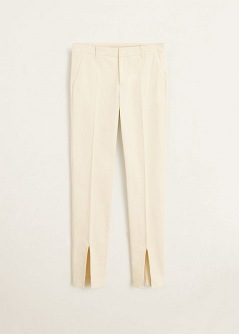

In [11]:
# Function to visualize different 
def visualizeImage(des_filename: string) -> None:
    """
        This function receives a filename and displays the image corresponding to that filename.
    """
    product = Image.open(des_filename)
    display(product)
    
visualizeImage("datathon/images/2019_41041002_02.jpg")
    

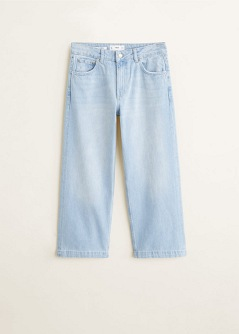

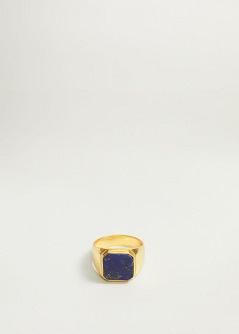

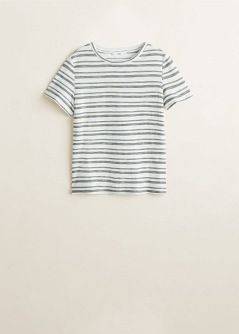

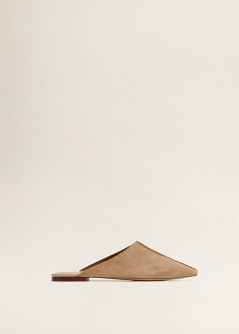

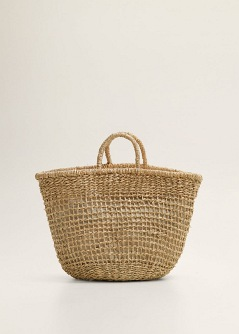

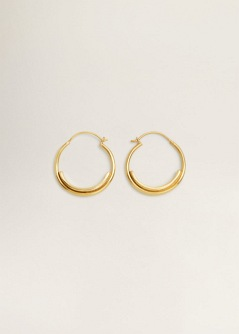

In [12]:
def visualizeOutfit(list_products: list) -> None:
    for prod in list_products:
        product = Image.open(prod)
        display(product)
        
outfit_example = prods_outfit[prods_outfit['cod_outfit'] == 7]["des_filename"].to_list()

visualizeOutfit(outfit_example)